In [73]:
from sklearn.preprocessing import StandardScaler
import random
import numpy as np 
import matplotlib.pyplot as plt
from time import time
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn import metrics


In [74]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(with_mean=False), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean")
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))
    

In [75]:
data = np.random.randint(0,101, size=(100, 3))
scaler = StandardScaler()x1 = np.random.randint(-101,0, size=(50, 1))
x2 = np.random.randint(0,101 ,size=(50,1))
scaled_data = scaler.fit_transform(data)

sc_x = scaled_data[:,0]
sc_y = scaled_data[:,1]
sc_y2 = scaled_data[:,2]

x = data[:,0]
y = data[:,1]
y2 = data[:,2]

plt.scatter(x,y, c='red')
plt.scatter(x,y2 ,c='blue')
plt.scatter(sc_x,sc_y, c = 'yellow')
plt.show()

SyntaxError: invalid syntax (<ipython-input-75-b7cb8f8e85c2>, line 2)

In [69]:
x = np.random.randint(-101,0, size=(100, 1))
x1 = np.random.randint(-101,0, size=(50, 1))
x2 = np.random.randint(0,101 ,size=(50,1))
x_new = np.concatenate((x1,x2),axis =0)

y = np.random.randint(0,101 ,size=(100,1))
data = np.concatenate((x,y),axis = 1)
labels = 50*[0] + 50*[1]





In [72]:
y = data[:,1]

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=2, n_init=2,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=2, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=2).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=2, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.011s	127	0.000	0.000	0.000	-0.010	-0.007	0.352
random   	0.013s	127	0.000	0.000	0.000	-0.009	-0.007	0.352
PCA-based	0.006s	127	0.000	0.000	0.000	-0.010	-0.007	0.347
__________________________________________________________________________________


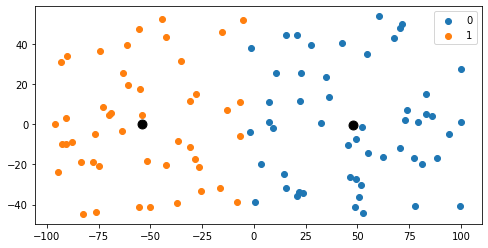

In [67]:
pca = PCA(2)
model = KMeans(n_clusters=2, init="k-means++", n_init=10)

datatr = pca.fit_transform(data)

model2 = model.fit_predict(datatr)
centroids = model.cluster_centers_

unique_labels = np.unique(model2)

fig = plt.figure(1, figsize=(8, 4))

for i in unique_labels:
    plt.scatter(datatr[model2 == i , 0], datatr[model2 == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()


In [60]:
x1 = np.random.randint(-101,50, size=(100, 1))
y1 = np.random.randint(-50,101 ,size=(100,1))
data1 = np.concatenate((x1,y1),axis = 1)

In [61]:
y1 = data[:,1]
labels = 100*[0] + 100*[1]
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=2, n_init=2,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data1, labels=labels)

kmeans = KMeans(init="random", n_clusters=2, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data1, labels=labels)

pca = PCA(n_components=2).fit(data1)
kmeans = KMeans(init=pca.components_, n_clusters=2, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data1, labels=labels)

print(82 * '_')


__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


ValueError: Found input variables with inconsistent numbers of samples: [200, 100]

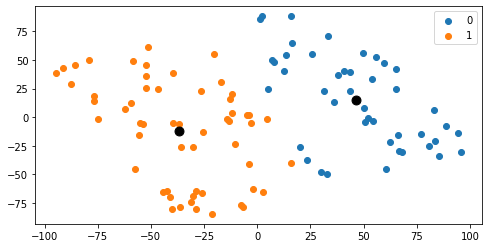

In [11]:
pca = PCA(2)
model = KMeans(n_clusters=2, init="k-means++", n_init=10)

datatr = pca.fit_transform(data1)

model2 = model.fit_predict(datatr)
centroids = model.cluster_centers_

unique_labels = np.unique(model2)

fig = plt.figure(1, figsize=(8, 4))

for i in unique_labels:
    plt.scatter(datatr[model2 == i , 0] , datatr[model2 == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [18]:
class my_kmeans:
    def __init__(self, a,b,c,d,nclus, name):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.nclus = nclus
        self.name = name
        
        self.c_data()
        self.m_config
    
    def c_data(self):
        
        x = np.random.randint(self.a,self.b, size=(100, 1))
        y = np.random.randint(self.c,self.d ,size=(100,1))

        data = np.concatenate((x,y),axis = 1)
        
        x = data[:,0]
        y = data[:,1]
    
        return data, y 
        
    def m_config(self):
        
        model = KMeans(n_clusters=self.nclus, init="k-means++", n_init=10)
    
        return model

    def b_k_means(self):
        
        data, y = self.c_data()
        model = self.m_config()
        
        model.fit(data)
        c = print(99*"_")
        d = print('init\t\tinertia\thomo\tcompl\tv-meas\tARS\tAMI\tsilhouette\n')
        b = print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (self.name, model.inertia_,
             metrics.homogeneity_score(y, model.labels_),
             metrics.completeness_score(y, model.labels_),
             metrics.v_measure_score(y, model.labels_),
             metrics.adjusted_rand_score(y, model.labels_),
             metrics.adjusted_mutual_info_score(y,  model.labels_),
             metrics.silhouette_score(data, model.labels_,
                                      metric='euclidean')))
        return b


    def p_plot(self):
        
        data, y = self.c_data()
        model = self.m_config()
        
        
        pca = PCA(2)

        datatr2 = pca.fit_transform(data)

        model3 = model.fit_predict(datatr2)
        centroids = model.cluster_centers_

        unique_labels = np.unique(model3)

        fig = plt.figure(1, figsize=(8, 4))

        for i in unique_labels:
            plt.scatter(datatr2[model3 == i , 0] , 
                        datatr2[model3 == i , 1] , label = i)
        plt.scatter(centroids[:,0], 
                    centroids[:,1] , s = 80, color = 'k')
        plt.legend()
        a = plt.show
    
        return a

    def run(self):
        
        data, y = self.c_data()
        model = self.m_config()
        b = self.b_k_means()
        a = self.p_plot()
        
        return b, a



In [19]:
b = my_kmeans(-100,0,0,100, 2, "kmeans")
b.b_k_means()

___________________________________________________________________________________________________
init		inertia	homo	compl	v-meas	ARS	AMI	silhouette

kmeans   	90251	0.159	0.952	0.272	0.013	0.096	0.396


<function matplotlib.pyplot.show(close=None, block=None)>

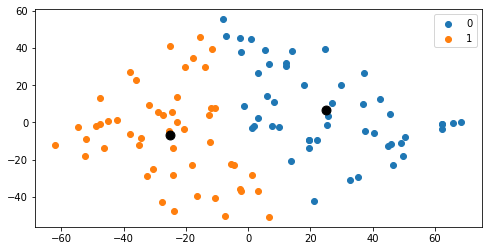

In [181]:
b.p_plot()

___________________________________________________________________________________________________
init		inertia	homo	compl	v-meas	ARS	AMI	silhouette

kmeans   	201853	0.146	0.903	0.252	0.008	0.062	0.377


(None, <function matplotlib.pyplot.show(close=None, block=None)>)

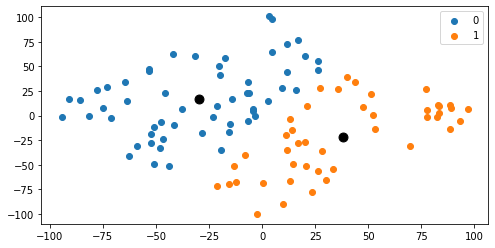

In [184]:
c = my_kmeans(-100,50,-50,100, 2, "kmeans")
c.run()